# **MA336: Artificial Intelligence and Machine Learning with Applications**
## **FINAL PROJECT**
### Submitted To: Dr Zoe Barlett
### Submitted By: 2311465 Muhammad Sharjeel Asif
---
---

## Problem Formulation: The English Premier League
---
The English Premier League is England's top division football league that commences every year in August and ends in May the following year. The league follows a "table standing" structure where teams compete to get to the top of the table to be crowned that year's champions. Overall the league contains **20 teams** which are further sectionized into the following categories:
* The team standing first at the end of the season is crowned the Champion of England
* The bottom 3 teams are relegated to the 2nd tier division for the subsequent season 
* The top 3 teams from the 2nd Division are promoted to play in the English Premier League for the subsequent season

During the course of the League, every team plays the other teams exactly twice, once at their home stadium and once at the other team's home stadium, these fixtures are more commonly referred to as **Home** and **Away** games. In total a team will play 38 games over the course of a single season and the total games of a single season of the English Premier League amounts to 380. The point system followed by the league is explained below:
* 3 Points to the team winning a fixture
* 0 points tot he team losing a fixture
* 1 point each to both the teams in case of a draw

The reason for choosing this problem is to create a predictive model to predict the future fixtures of the league based on the previous data. This would work based on the features that are available to us before the match starts, such as recent form, record over the previous seasons, the current standing of the team and so on. This predictive model can then be used by betting sites and betting agencies to place bets before the start of the game. In a way it would work like Google's win predictor which calculates the probabilities in 3 categories:
* Home Team Win Chances
* Draw Chances
* Away Team Win Chances

To begin with the solution of the problem, we would first need to import all the required libraries. For this project, we would primarily use the following libraries:
* Pandas and Numpy for EDA and Feature Extraction
* Matplotlib and Seaborn for Data Visualization
* Sklearn for Model Prediction

In [109]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## DataSet Preprocessing
---
The dataset used for the project can be found on Kaggle [here](https://www.kaggle.com/datasets/saife245/english-premier-league). The dataset contains data for the matches of the English Premier League over the last 20 years (2001 - 2022 seasons). The dataset was predominantly created for the prpose of betting and therefore contains many featues related to match bets from different websites which were not required for the scope of this project as we were only interested in predicting the outcomes of the games. After downloading the dataset we saw that every season has it's own .csv so the first thing that was required to do was to concatenate all the seasons into a single csv file which could be read into our notebook to allow for further data preprocessing.

Once all the datasets were loaded under different names, we noticed that the datasets did not a specific column depicting the seasons (since they were in separate csv files so it was redundant and not needed). The first thing that was needed was to add a feature "Season" so the rows could be identified according to the seasons.
Once that was done for all the dataframes separately what was left was to use the concat function under the pandas library to concatenate all the dataframes on top of each other and we named this combined dataframe as "league".

In [110]:
epl_2001_2002 = pd.read_csv('2000-2001.csv')
epl_2002_2003 = pd.read_csv('2002-2003.csv')
epl_2003_2004 = pd.read_csv('2003-2004.csv')
epl_2004_2005 = pd.read_csv('2004-2005.csv')
epl_2005_2006 = pd.read_csv('2005-2006.csv')
epl_2006_2007 = pd.read_csv('2006-2007.csv')
epl_2007_2008 = pd.read_csv('2007-2008.csv')
epl_2008_2009 = pd.read_csv('2008-2009.csv')
epl_2009_2010 = pd.read_csv('2009-2010.csv')
epl_2010_2011 = pd.read_csv('2010-2011.csv')
epl_2011_2012 = pd.read_csv('2011-2012.csv')
epl_2012_2013 = pd.read_csv('2012-2013.csv')
epl_2013_2014 = pd.read_csv('2013-2014.csv')
epl_2014_2015 = pd.read_csv('2014-2015.csv')
epl_2015_2016 = pd.read_csv('2015-2016.csv')
epl_2016_2017 = pd.read_csv('2016-2017.csv')
epl_2017_2018 = pd.read_csv('2017-2018.csv')
epl_2018_2019 = pd.read_csv('2018-2019.csv')
epl_2019_2020 = pd.read_csv('2019-2020.csv')
epl_2020_2021 = pd.read_csv('2020-2021.csv')
epl_2021_2022 = pd.read_csv('2021-2022.csv')

In [111]:
# Adding the Season colulm to all the datasets as it is initially not given
epl_2001_2002['Season'] = '2001_2002'
epl_2002_2003['Season'] = '2002_2003'
epl_2003_2004['Season'] = '2003_2004'
epl_2004_2005['Season'] = '2004_2005'
epl_2005_2006['Season'] = '2005_2006'
epl_2006_2007['Season'] = '2006_2007'
epl_2007_2008['Season'] = '2007_2008'
epl_2008_2009['Season'] = '2008_2009'
epl_2009_2010['Season'] = '2009_2010'
epl_2010_2011['Season'] = '2010_2011'
epl_2011_2012['Season'] = '2011_2012'
epl_2012_2013['Season'] = '2012_2013'
epl_2013_2014['Season'] = '2013_2014'
epl_2014_2015['Season'] = '2014_2015'
epl_2015_2016['Season'] = '2015_2016'
epl_2016_2017['Season'] = '2016_2017'
epl_2017_2018['Season'] = '2017_2018'
epl_2018_2019['Season'] = '2018_2019'
epl_2019_2020['Season'] = '2019_2020'
epl_2020_2021['Season'] = '2020_2021'
epl_2021_2022['Season'] = '2021_2022'

In [112]:
# concatenate the datasets to form one final dataframe and naming it league
league = pd.concat([epl_2001_2002,epl_2002_2003,epl_2003_2004,epl_2004_2005,epl_2005_2006,epl_2006_2007,epl_2007_2008,epl_2008_2009,epl_2009_2010,epl_2010_2011,epl_2011_2012,epl_2012_2013,epl_2013_2014,epl_2014_2015,epl_2015_2016,epl_2016_2017,epl_2017_2018,epl_2018_2019,epl_2019_2020,epl_2020_2021,epl_2021_2022])
league.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,18/08/01,Charlton,Everton,1.0,2.0,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,18/08/01,Derby,Blackburn,2.0,1.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,18/08/01,Leeds,Southampton,2.0,0.0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,18/08/01,Leicester,Bolton,0.0,5.0,A,0.0,4.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,18/08/01,Liverpool,West Ham,2.0,1.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Once this was completed and we were left with one final dataframe, we realzied that there were over 160 columns, alot of which had data from different betting sites with regards to each individial match. Since, this was out of the scope of this project so we dropeed all the columns that were not needed and used the .loc method to only keep the fetures that were required. Furthermore, the columns were renamed from their original names for easy readibility and understanding.

In [113]:
# keep the features wanted and renameing the columns for better readibility
league_results = league.loc[:,['Season','Date','HomeTeam','AwayTeam','HTHG','HTAG','HTR','FTHG','FTAG','FTR','HS','AS','HST','AST','HY','AY','HR','AR']]
league_results.rename(columns={'HomeTeam': 'Home Team', 'AwayTeam': 'Away Team','HTHG':'Half Time Home Goals','HTAG':'Half Time Away Goals','HTR':'Half Time Result','FTHG':'Full Time Home Goals','FTAG':'Full Time Away Goals','FTR':'Full Time Result','HS':'Home Team Shots','AS':'Away Team Shots','HST':'Home Team Shots on Target','AST':'Away Team Shots on Target','HY':'Home Team Yellow Cards','AY':'Away Team Yellow Cards','HR':'Home Team Red Cards','AR':'Away Team Red Cards'}, inplace=True)
league_results.shape

(7981, 18)

## Preliminary Analysis and EDA
---
When starting to observe the dataset, the first metric we wil look at would be the number of times the Home Team wins a game vs the number of times they draw the game and how many times would the home team lose the game; since, historically speaking it is estimated that the home team always has a "home advantage" so it is difficult for a team playing away to beat a team playing at home.

In [114]:
# basic stats of home wins, away wins, and draws and getting percentages of all three
scores_overall = league_results['Full Time Result'].value_counts()
print(scores_overall)
home_advantage = (league_results['Full Time Result'].value_counts() / len(league_results)) * 100
print(home_advantage)

Full Time Result
H    3652
A    2344
D    1984
Name: count, dtype: int64
Full Time Result
H    45.758677
A    29.369753
D    24.859040
Name: count, dtype: float64


From the stats observed above we can conclude that it is indeed true that a team playing at Home has a 45.7% chances of winning a game as opposed to the Away team winning, whose chances are only 29.3%. The rest 24.8% constitute the draws. This would be better explained by the use of a barplot producing the count for all the three possible outcomes. We would use the librarires seaborn and matplotlib to achieve this.

C:\Users\DSU\AppData\Local\Temp\ipykernel_4380\3741159815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Full Time Result', data=league_results, order=order.index, palette='BuPu')


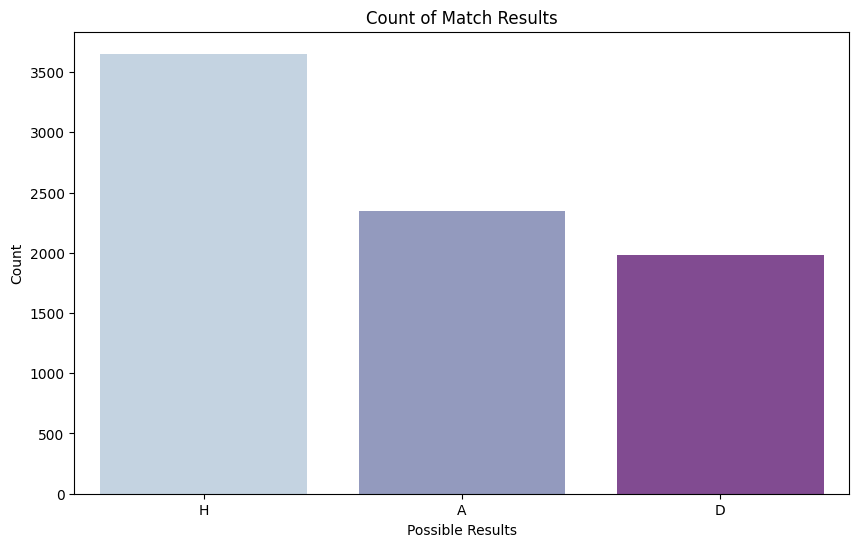

In [115]:
# Graphing the basic stats that we got above
league_results.reset_index(drop=True, inplace=True)
order = league_results['Full Time Result'].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(10,6))
sns.countplot(x='Full Time Result', data=league_results, order=order.index, palette='BuPu')
plt.title('Count of Match Results')
plt.xlabel('Possible Results')
plt.ylabel('Count')
plt.show()

Another metric of predicting the outcome of matches would be the status of a match at the half-way stage, known as halftime. It would be estimated that there would be a positive corrlation between the results of half time vs the results at the end of the match such that on average, the team that leads the game at half time would go on to win the match more often than not. This relation can be shown using a corrlation matrix heatmap using seaborn library and we can see that it is indeed a moderately strong positive relation with a value of 0.6.

C:\Users\DSU\AppData\Local\Temp\ipykernel_4380\1234718928.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results_df.replace({'H': 1, 'D': 0, 'A': -1}, inplace=True) # giving the strings numeric values to get a correlation matrix
C:\Users\DSU\AppData\Local\Temp\ipykernel_4380\1234718928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.replace({'H': 1, 'D': 0, 'A': -1}, inplace=True) # giving the strings numeric values to get a correlation matrix


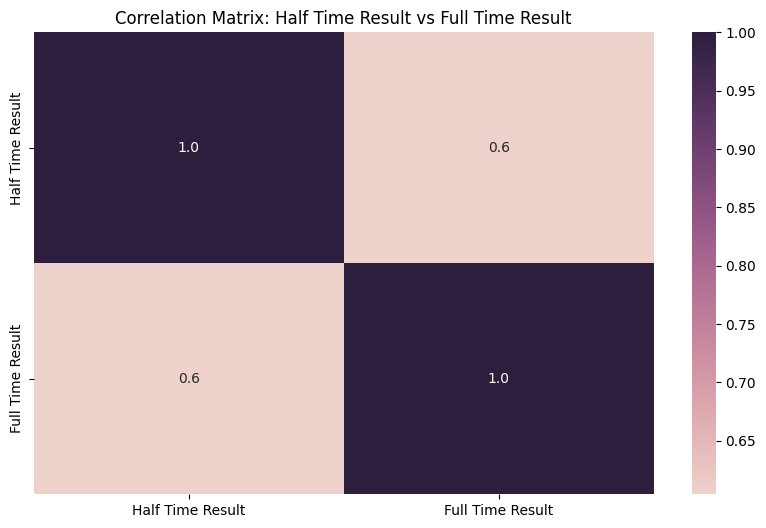

In [116]:
# Plotting the correlation matrix between the half time and the full time result to check if having a half time lead is advantageous
results = ['Half Time Result', 'Full Time Result']
results_df = league_results[results]
results_df.replace({'H': 1, 'D': 0, 'A': -1}, inplace=True) # giving the strings numeric values to get a correlation matrix
corr_max = results_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_max, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".1f") # plot the correlation matrix as a heatmap
plt.title('Correlation Matrix: Half Time Result vs Full Time Result')
plt.show()

Once we have establihsed the basic statistics it is not time to set up the actual point system itself, for that we will be following the pointing system used in the league to award points based on the results of a single match. To achieve this we would make 2 features for the Home and Away Teams respectively, namely, 'Home Team Points' and 'Away Team Points' and give points to them separately in their respective columns.

In [240]:
# giving the points to the taems based on the system:
# Win for a team = 3 points
# Loss for a team = 0 points
# Draw = 1 point for each team
league_results['Home Team Points'] = 0
league_results['Away Team Points'] = 0
league_results.loc[league_results['Full Time Result'] == 'H', 'Home Team Points'] = 3
league_results.loc[league_results['Full Time Result'] == 'A', 'Away Team Points'] = 3
league_results.loc[league_results['Full Time Result'] == 'D', ['Home Team Points', 'Away Team Points']] = 1
league_results.shape

(7981, 29)

The next feature to add would be to name the winning team of each encounter, for that we would create a feature named 'Winner' and we would use a lambda function to create nexted if-else statements to assign the winning team name to this feature, incase of a draw, the value entered would be 'None'.

In [241]:
# Assign the winner of every match using a lambda function on the x variable (x = the individual rows)
league_results['Winner'] = league_results.apply(lambda x:x['Home Team'] if x['Full Time Result'] == 'H' else(x['Away Team'] if x['Full Time Result'] == 'A' else None) , axis = 1)
league_results.shape

(7981, 29)

Now that we have made the preliminary table that assigns points to each team based on the outcome of individual matches, it is time to scale up the dataframe to start adding the points of each team after successive games. For this we would use a user-defined function and apply it on the dataframe using 2 key concepts:

* Using a dictionary to store the names of teams and their accumulated points over a season. The dictionary would have to be reset to 0 after every 380th as that it would signift the start of the new season hence the points would need to be refreshed
* Using the .get dictionary function to get the key and assign the value to it based on the same scheme (3 for win, 0 for loss and 1 for draw).

This piece of code will keep a cummulative track of the points of a team as it plays throughout the season and refresh itself to 0 once the new season starts

In [119]:
# Using a dictionary to keep track of all the points accumulated by a team over a season
points_dict = {} # initialize an empty dictionary
def score_updater(row):
    '''
    This function takes a dataframe row as an input and creates a dictionary at the start of every season then creates a key:value 
    pair that stores the points of each team as they go through the season. The more games they play the more points they accumulate.
    At the 380th game, the season ends so the dictionary is refreshed.
    '''

    global points_dict
    if row.name%380 == 0: # using the value 380 to refresh the dictionary as the season changes after every 380 matches
        points_dict = {}
    
    winner = row["Winner"]
    
    if winner is not None: # winner == None means the game was a draw
        points_dict[winner] = points_dict.get(winner, 0) + 3
    else:
        home = row['Home Team']
        away = row['Away Team']
        points_dict[home] = points_dict.get(home, 0) + 1
        points_dict[away] = points_dict.get(away, 0) + 1

    return points_dict.get(row['Winner'], 0)
league_results['Updated Score'] = league_results.apply(score_updater, axis=1) # 'Updated Score' column holds the points of each team as they go deeper into the season

,Season,Date,Home Team,Away Team,Half Time Home Goals,Half Time Away Goals,Half Time Result,Full Time Home Goals,Full Time Away Goals,Full Time Result,...,Home Team Shots on Target,Away Team Shots on Target,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards,Home Team Points,Away Team Points,Winner,Updated Score
0,2001_2002,18/08/01,Charlton,Everton,0.0,0.0,D,1.0,2.0,A,...,4.0,9.0,0.0,3.0,0.0,0.0,0,3,Everton,3


The next part of the analysis would deal with the impact of having a first half lead on the final result. This would have to be achieved in two steps, first we would need to distinguish the rows where there was one team leading the game at half time vs the rows where there was no team in the lead. It could have been 0:0 , 1:1, 2:2 or so on but there was no lead as all of these values would essentially be taken the same.

Once that distinction is made using a lambda function with an if-else condition, the values are stored in the new feature 'Half Time Lead'. Now that column will act as the argument to the helper function 'lead_preserve_checker' to see whether the teamw as able to hold onto the lead (and win the game), concede goals equal to their lead (and drew) or they had their lead overturned (and lost the game). All these values will be returned to the feature 'Lead Preserved'.

In [120]:
# Checking if the team holding a lead at half time was able to preserve it or not
league_results['Half Time Lead'] = abs(league_results['Half Time Home Goals'] - league_results['Half Time Away Goals']) # new column to check if any team led at half time or not
league_results['Half Time Lead'] = league_results.apply(lambda x: 'Draw at Half Time' if x['Half Time Lead'] == 0 else x['Half Time Lead'], axis=1) # lambda function to update the value if the team had a lead or not to string 


def lead_preserve_checker(row):
    '''
    This function takes a dataframe row as an input and checks the 'Half Time Lead' column to see if there was a lead at half time or not.
    If no lead then it does nothing and displays that there was no lead. If there was a lead at hlaf time, it checks if the lead was preserved,
    overturned or was a draw salvaged by the team trailing at half time.
    '''
    lead = row['Half Time Lead']
    if lead != 'Draw at Half Time': # check if there was a lead at half time or not
        if row['Half Time Result'] == row['Full Time Result']: # if half time winner was the same as full time winner it means lead preserved
            return 'Lead Preserved'
        elif row['Full Time Result'] == 'D': # if full time was a draw means a draw was salvaged
            return 'No, but Draw'
        else:
            return 'Lead Overturned' # this means the lead was overturned and the team trailing went on to win
    else:
        return 'Draw at Half Time' # if there was no lead, return this
    
league_results['Lead Preserved'] = league_results.apply(lead_preserve_checker, axis=1)

,Season,Date,Home Team,Away Team,Half Time Home Goals,Half Time Away Goals,Half Time Result,Full Time Home Goals,Full Time Away Goals,Full Time Result,...,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards,Home Team Points,Away Team Points,Winner,Updated Score,Half Time Lead,Lead Preserved
0,2001_2002,18/08/01,Charlton,Everton,0.0,0.0,D,1.0,2.0,A,...,0.0,3.0,0.0,0.0,0,3,Everton,3,Draw at Half Time,Draw at Half Time


Now that we have extracted a very useful feature we can use it to extract some insights into the dataframe. Using the .value_counts() function on the newly created column 'Lead Preserved' we can see that the team leading the game at half time would go on and win the game 45% of the time while the team which is trailing at half time would be able to overturn the defecit only 4.2% of the time. This signifies that there is a huge advantage of being in the lead at half-time.

This can also be presented through a barplot using the Seaborn library to show that once the lead at half time begins to grow, there is almost 0 chance of the trailing team mounting a comeback. We can also make another graph showing the count of such matches where the team holding the lead went on to win the game, draw it or loes it by conceding more than they had scored in the first half.

In [121]:
# checking the percantage of the results we obtained from the above function
half_full_time = (league_results['Lead Preserved'].value_counts() / len(league_results)) * 100
print(half_full_time)

Lead Preserved
Lead Preserved       45.006891
Draw at Half Time    41.260494
No, but Draw          9.522616
Lead Overturned       4.209999
Name: count, dtype: float64


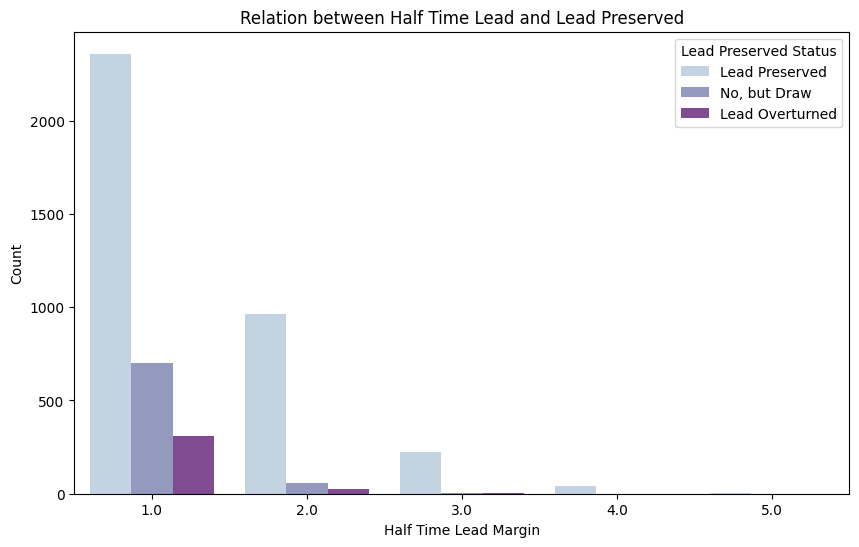

In [122]:
# Making a plot of the games where game was not a draw at half time to check the occurances of lead preserved, lead overturned and draw
half_time_lead_graph = league_results[league_results['Half Time Lead'] != 'Draw at Half Time'] #  exclude the games where half time was a draw
plt.figure(figsize=(10,6))
sns.countplot(data=half_time_lead_graph, x='Half Time Lead', hue='Lead Preserved', palette='BuPu')
plt.title('Relation between Half Time Lead and Lead Preserved')
plt.xlabel('Half Time Lead Margin')
plt.ylabel('Count')
plt.legend(title='Lead Preserved Status')
plt.show()

Making a plot of the actual number of matches where a team was leading at half time to see how many matches went on to provide the above mentioned 3 outcomes. 

In [123]:
# Printhing the actual values instead of percentages
print(league_results['Lead Preserved'].value_counts())

Lead Preserved
Lead Preserved       3592
Draw at Half Time    3293
No, but Draw          760
Lead Overturned       336
Name: count, dtype: int64


C:\Users\DSU\AppData\Local\Temp\ipykernel_4380\3716404659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lead_preserved, x='Lead Preserved', order=order.index, palette='BuPu')


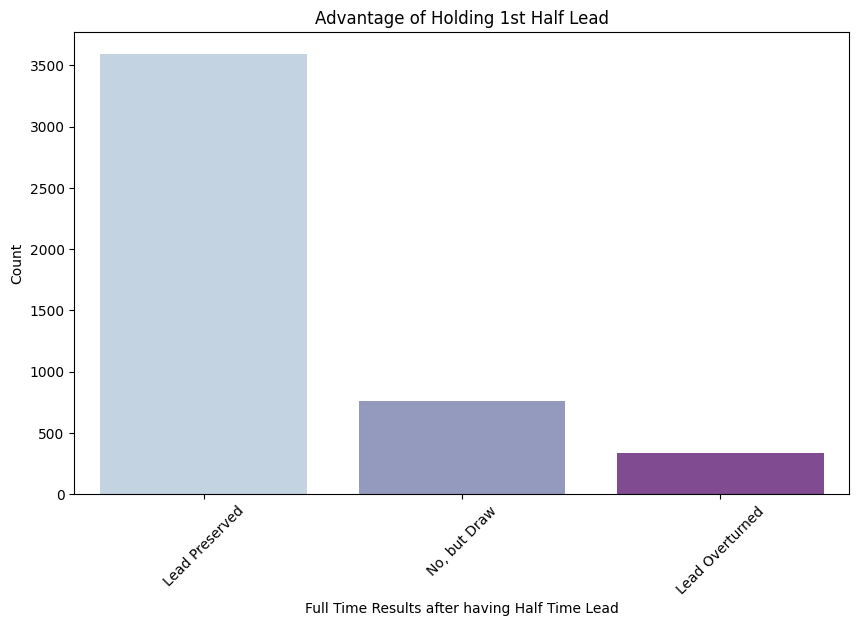

In [124]:
lead_preserved = league_results[league_results['Lead Preserved'] != 'Draw at Half Time'] # dropping the drawn games at half time
order = lead_preserved['Lead Preserved'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=lead_preserved, x='Lead Preserved', order=order.index, palette='BuPu')

plt.title('Advantage of Holding 1st Half Lead')
plt.xlabel('Full Time Results after having Half Time Lead')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Another feature that is considered substantial in Football are the Yellow and Red Cards. When a player commits a foul in the game that is considered mildly innapropriate and steals the advantage from the opposing team unfairly he/she is handed a yellow card while if the foul committed is of a grave nature, a straight red card is given and the player is sent off for the rest of the game, meaning the team gets down to 10 men for the remainder of the match. This is a significant disadvantage and gives the opposing team an edge to score because of the extra man they have.

First we will create two columns to count the total cards given to the home and away teams in a single match and then see the impact of red cards on the match as they are more severe in nature. To achieve this, we can use a user-defined helper function red_card_impact that would first sort out the rows in which home or away teams were given a red card and then comapre it's effect to the Full Time Match Result and make a correlation between the two. The values will be stored in the new feature 'Red Card Impact'.

In [125]:
# Add the total cards given to the home and away team in individual matches
league_results['Home Team Total Cards'] = league_results['Home Team Yellow Cards'] + league_results['Home Team Red Cards']
league_results['Away Team Total Cards'] = league_results['Away Team Yellow Cards'] + league_results['Away Team Red Cards']

,Season,Date,Home Team,Away Team,Half Time Home Goals,Half Time Away Goals,Half Time Result,Full Time Home Goals,Full Time Away Goals,Full Time Result,...,Home Team Red Cards,Away Team Red Cards,Home Team Points,Away Team Points,Winner,Updated Score,Half Time Lead,Lead Preserved,Home Team Total Cards,Away Team Total Cards
0,2001_2002,18/08/01,Charlton,Everton,0.0,0.0,D,1.0,2.0,A,...,0.0,0.0,0,3,Everton,3,Draw at Half Time,Draw at Half Time,0.0,3.0


In [126]:
# impact of red cards
def red_card_impact(row):
    '''
    This function takes a dataframe row as an input and checks the impact of red cards on the outcome of matches for both home and away teams.
    '''
    if row['Home Team Red Cards'] > 0: # check if home team got a red card
        if row['Full Time Result'] == 'H': # check if the home team won 
            return 'Home Team got Red Card and Won' 
        elif row['Full Time Result'] == 'D': # check if gome team drew
            return 'Home Team got Red Card and Drew'
        else:
            return 'Home Team got Red Card and Lost' # check if home team lost
    elif row['Away Team Red Cards'] > 0: # check if away team got a red card
        if row['Full Time Result'] == 'A': # check if away team won
            return 'Away Team got Red Card and Won' 
        elif row['Full Time Result'] == 'D': # check if away team drew
            return 'Away Team got Red Card and Drew' 
        else:
            return 'Away Team got Red Card and Lost' # check if home team lost
    else:
        return 'No Red Cards in the Game' # if no team got a red card in the game

league_results['Red Card Impact'] = league_results.apply(red_card_impact, axis=1)

,Season,Date,Home Team,Away Team,Half Time Home Goals,Half Time Away Goals,Half Time Result,Full Time Home Goals,Full Time Away Goals,Full Time Result,...,Away Team Red Cards,Home Team Points,Away Team Points,Winner,Updated Score,Half Time Lead,Lead Preserved,Home Team Total Cards,Away Team Total Cards,Red Card Impact
0,2001_2002,18/08/01,Charlton,Everton,0.0,0.0,D,1.0,2.0,A,...,0.0,0,3,Everton,3,Draw at Half Time,Draw at Half Time,0.0,3.0,No Red Cards in the Game


Based on our previous function we will be left with 6 possible outcomes:
* Away Team got Red Card and Lost
* Away Team got Red Card and Drew
* Away Team got Red Card and Won
* Home Team got Red Card and Lost
* Home Team got Red Card and Drew
* Home Team got Red Card and Won

We can calculate the individual percentages of all 6 of these possible outcomes and make a bar plot to visualize them using Seaborn library. The graph shows that there is not only a correlation between the final result and red cards being awarded to the teams but also with the fact that whether it was the home or away team that got a red card, with the later struggling to win in case a red card is given to it.

In [212]:
# doing statistical analysis on the 6 outcomes we are able to get to see the percentages of results possible
away_red_lost = len(league_results[league_results['Red Card Impact'] == 'Away Team got Red Card and Lost'])
away_red_draw = len(league_results[league_results['Red Card Impact'] == 'Away Team got Red Card and Drew'])
away_red_won = len(league_results[league_results['Red Card Impact'] == 'Away Team got Red Card and Won'])
home_red_lost = len(league_results[league_results['Red Card Impact'] == 'Home Team got Red Card and Lost'])
home_red_draw = len(league_results[league_results['Red Card Impact'] == 'Home Team got Red Card and Drew'])
home_red_won = len(league_results[league_results['Red Card Impact'] == 'Home Team got Red Card and Won'])

away_cards_total = away_red_draw + away_red_lost + away_red_won
home_cards_total = home_red_draw + home_red_lost + home_red_won


away_red_lost_percent = (away_red_lost/away_cards_total) * 100
away_red_draw_percent = (away_red_draw/away_cards_total) * 100
away_red_won_percent = (away_red_won/away_cards_total) * 100
home_red_lost_percent = (home_red_lost/home_cards_total) * 100
home_red_draw_percent = (home_red_draw/home_cards_total) * 100
home_red_won_percent = (home_red_won/home_cards_total) * 100


print(f'The times when Away Team got Red Card and Lost is {away_red_lost_percent} %')
print(f'The times when Away Team got Red Card and Drew is {away_red_draw_percent} %')
print(f'The times when Away Team got Red Card and Won is {away_red_won_percent} %')
print(f'The times when Home Team got Red Card and Lost is {home_red_lost_percent} %')
print(f'The times when Home Team got Red Card and Drew is {home_red_draw_percent} %')
print(f'The times when Home Team got Red Card and Won is {home_red_won_percent} %')

The times when Away Team got Red Card and Lost is 62.45954692556634 %
The times when Away Team got Red Card and Drew is 24.110032362459545 %
The times when Away Team got Red Card and Won is 13.430420711974108 %
The times when Home Team got Red Card and Lost is 50.63559322033898 %
The times when Home Team got Red Card and Drew is 26.27118644067797 %
The times when Home Team got Red Card and Won is 23.093220338983052 %


C:\Users\DSU\AppData\Local\Temp\ipykernel_4380\4173618912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=red_card_data, x='Red Card Impact',order=order.index, palette='BuPu')


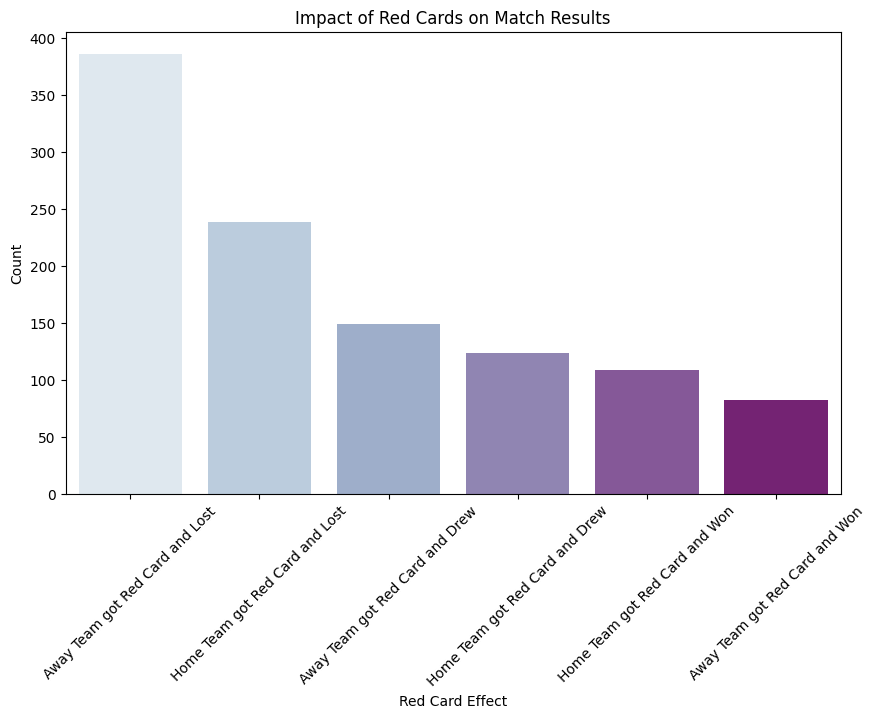

In [128]:
# plotting the above given results after dropping the matches that had no red card in the game
red_card_data = league_results[league_results['Red Card Impact'] != 'No Red Cards in the Game']
order = red_card_data['Red Card Impact'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.countplot(data=red_card_data, x='Red Card Impact',order=order.index, palette='BuPu')


plt.title('Impact of Red Cards on Match Results')
plt.xlabel('Red Card Effect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Another imprtant metric of measuring a team's performance over the season are the number of goals scored in favor of the team and against the team, and then a goal difference is calculated to check the overall goal scoring capabilities of the team. Another important use of this metric is that if two teams are tied on points on the table at the end of the season, the team with the better Goal Difference is given a higher place on the table. 

To calculate this, we will use the same technique of using a dictionary to create key-value pairs for all the teams in a season and then subsequnetly add their goals scored across the games they play. The function will have to be run twice though, once for the goals scored as the Home Team and once as the Away Team, further down we can use addition to combine the values and get the total goals scored by a team.

In [243]:
# making a cumulative counter for the goals scored by a team over the season, it refreshes after every season based on the previous concept of 380 games
home_goals_dict = {}

def home_goals(row):
    '''
    This function takes a dataframe row as an input and creates a dictionary at the start of every season then creates a key:value 
    pair that stores the goals scored of each team as they go through the season on home games basis. The more games they play at home
    the more home goals they accumulate. At the 380th game, the season ends so the dictionary is refreshed.
    '''
    global home_goals_dict
    if row.name%380 == 0:
        home_goals_dict = {}
    
    home_team = row['Home Team']
    home_goals = row['Full Time Home Goals']
    
    # Update the cumulative goals for the home team
    home_goals_dict[home_team] = home_goals_dict.get(home_team, 0) + home_goals
    
    return home_goals_dict.get(home_team, 0)

league_results['Goals Scored at Home'] = league_results.apply(home_goals, axis=1)


away_goals_dict = {}

def away_goals(row):
    '''
    This function takes a dataframe row as an input and creates a dictionary at the start of every season then creates a key:value 
    pair that stores the goals scored of each team as they go through the season on away games basis. The more games they play away
    the more away goals they accumulate. At the 380th game, the season ends so the dictionary is refreshed.
    '''
    global away_goals_dict
    if row.name%380 == 0:
        away_goals_dict = {}
    
    away_team = row['Away Team']
    away_goals = row['Full Time Away Goals']
    
    # Update the cumulative goals for the home team
    away_goals_dict[away_team] = away_goals_dict.get(away_team, 0) + away_goals
    
    return away_goals_dict.get(away_team, 0)

league_results['Goals Scored Away'] = league_results.apply(away_goals, axis=1)

league_results.head()


,Season,Date,Home Team,Away Team,Half Time Home Goals,Half Time Away Goals,Half Time Result,Full Time Home Goals,Full Time Away Goals,Full Time Result,...,Away Team Points,Winner,Updated Score,Half Time Lead,Lead Preserved,Home Team Total Cards,Away Team Total Cards,Red Card Impact,Goals Scored at Home,Goals Scored Away
0,2001_2002,18/08/01,Charlton,Everton,0.0,0.0,D,1.0,2.0,A,...,3,Everton,3,Draw at Half Time,Draw at Half Time,0.0,3.0,No Red Cards in the Game,1.0,2.0
1,2001_2002,18/08/01,Derby,Blackburn,1.0,0.0,H,2.0,1.0,H,...,0,Derby,3,1.0,Lead Preserved,1.0,0.0,No Red Cards in the Game,2.0,1.0
2,2001_2002,18/08/01,Leeds,Southampton,0.0,0.0,D,2.0,0.0,H,...,0,Leeds,3,Draw at Half Time,Draw at Half Time,1.0,3.0,Away Team got Red Card and Lost,2.0,0.0
3,2001_2002,18/08/01,Leicester,Bolton,0.0,4.0,A,0.0,5.0,A,...,3,Bolton,3,4.0,Lead Preserved,4.0,3.0,No Red Cards in the Game,0.0,5.0
4,2001_2002,18/08/01,Liverpool,West Ham,1.0,1.0,D,2.0,1.0,H,...,0,Liverpool,3,Draw at Half Time,Draw at Half Time,1.0,5.0,No Red Cards in the Game,2.0,1.0


Using all the data we have placed in the table "league_results" uptil now, we can create a table that resembles a table of the premier league. For that we are going to add the following features:
* Points Won at Home - Points won by a team when playing at their home stadium
* Points Won Away - Points won by a team when playing away frmo their home stadium
* Total Points - Adding the points won at home and the points won away
* Goals Scored at Home - Total Goals scored when playing at their home stadium
* Goals Scored Away - Total Goals scored when playing away from their home stadium
* Goals For - Adding the goals scored at home and away to get the total goals scored in a season
* Goals Conceded at Home - Total Goals conceded when playing at their home stadium
* Goals Condeded Away - Total Goals conceded when playing away from their home stadium
* Goals Against - Adding the goals conceded throughout the season at home and away from home
* Goal Difference - Subtracting the total goals scored and the total goals conceded to get the final goal difference of the season
* Position - The position of the team at the end of the season based on all the factors
* Average Position in the Last 3 Season - The position of the team in the last 3 seasons to get the recent form
* Average Goal Differnece in the Last 3 Seasons - The average GD of the team over the last 3 seasons to get the goal scoring form

In [244]:
# Making a premier league table for each season based on the columns we have created above
season_points = pd.DataFrame()
season_points['Points Won at Home'] = league_results.groupby(['Season', 'Home Team'])['Home Team Points'].sum() # points of home team playing at home
season_points['Points Won Away'] = league_results.groupby(['Season', 'Away Team'])['Away Team Points'].sum() # points of the home team playing away
season_points['Total Points'] = season_points['Points Won at Home'] + season_points['Points Won Away'] # total points by adding home and away
season_points['Goals Scored at Home'] = league_results.groupby(['Season','Home Team'])['Full Time Home Goals'].sum() # goals scored by home team at home
season_points['Goals Scored Away'] = league_results.groupby(['Season','Away Team'])['Full Time Away Goals'].sum() # goals scored by home team away
season_points['Goals For'] = season_points['Goals Scored at Home'] + season_points['Goals Scored Away'] # total goals scored
season_points['Goals Conceded at Home'] = league_results.groupby(['Season','Home Team'])['Full Time Away Goals'].sum() # goals conceded by home team at home
season_points['Goals Conceded Away'] = league_results.groupby(['Season','Away Team'])['Full Time Home Goals'].sum() # goals conceded by home team away
season_points['Goals Against'] = season_points['Goals Conceded at Home'] + season_points['Goals Conceded Away'] # total goals conceded
season_points['Goal Difference'] = season_points['Goals For'] - season_points['Goals Against'] # goals scored - goals conceded
season_points = season_points.sort_values(by=['Season', 'Total Points', 'Goal Difference'], ascending=[True, False, False]) # sorting the values to assign the winner of every season
season_points['Position'] = season_points.groupby('Season').cumcount() + 1 # assigning a position column based on the row position
season_points['Average Position in Last 3 Seasons'] = season_points.groupby('Home Team')['Position'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True) # getting the average position of the team in the last 3 seasons for model training
season_points['Average Goal Difference in Last 3 Seasons'] = season_points.groupby('Home Team')['Goal Difference'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True) # getting the average goal difference of the team in the last 3 seasons for model training

season_points.head()

Points Won at Home  Points Won Away  Total Points  \
Season    Home Team                                                       
2001_2002 Arsenal                     40               47            87   
          Liverpool                   41               39            80   
          Man United                  35               42            77   
          Newcastle                   39               32            71   
          Leeds                       33               33            66   

                      Goals Scored at Home  Goals Scored Away  Goals For  \
Season    Home Team                                                        
2001_2002 Arsenal                     42.0               37.0       79.0   
          Liverpool                   33.0               34.0       67.0   
          Man United                  40.0               47.0       87.0   
          Newcastle                   40.0               34.0       74.0   
          Leeds                       31.0               22.0       53.0   

                      Goals Conceded at Home  Goals Conceded Away  \
Season    Home Team                                                 
2001_2002 Arsenal                       25.0                 11.0   
          Liverpool                     14.0                 16.0   
          Man United                    17.0                 28.0   
          Newcastle                     23.0                 29.0   
          Leeds                         21.0                 16.0   

                      Goals Against  Goal Difference  Position  \
Season    Home Team                                              
2001_2002 Arsenal              36.0             43.0         1   
          Liverpool            30.0             37.0         2   
          Man United           45.0             42.0         3   
          Newcastle            52.0             22.0         4   
          Leeds                37.0             16.0         5   

                      Average Position in Last 3 Seasons  \
Season    Home Team                                        
2001_2002 Arsenal                                    1.0   
          Liverpool                                  2.0   
          Man United                                 3.0   
          Newcastle                                  4.0   
          Leeds                                      5.0   

                      Average Goal Difference in Last 3 Seasons  
Season    Home Team                                              
2001_2002 Arsenal                                          43.0  
          Liverpool                                        37.0  
          Man United                                       42.0  
          Newcastle                                        22.0  
          Leeds                                            16.0

After making the EPL tables for all the seasons we can make a bar plot to depict the total number of trophies a team as won in the last 20 years

C:\Users\DSU\AppData\Local\Temp\ipykernel_4380\1398024002.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Home Team', y='count', data=titles_won, palette='BuPu')


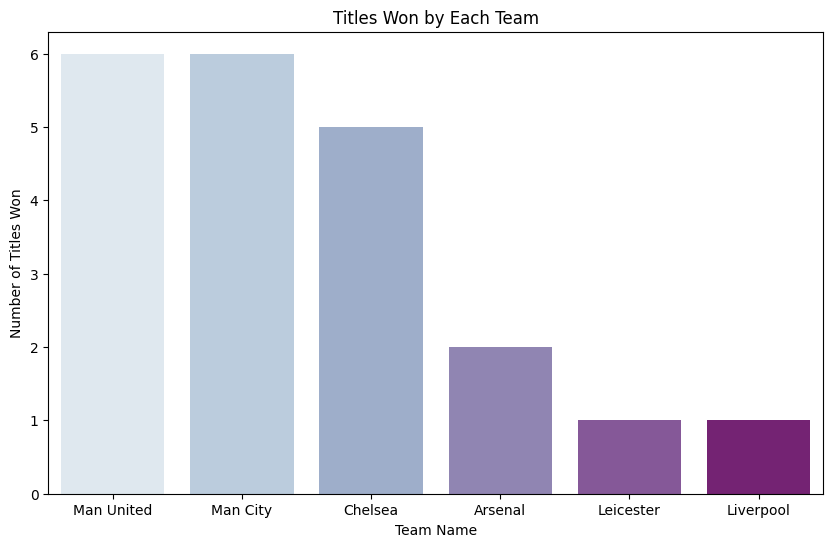

In [226]:
champion_team = season_points[season_points['Position'] == 1] # getting all the teams that ended the season on position 1
champion_team = champion_team.reset_index()
titles_won = champion_team['Home Team'].value_counts()
titles_won = pd.DataFrame(titles_won)

titles_won
plt.figure(figsize=(10, 6))
sns.barplot(x='Home Team', y='count', data=titles_won, palette='BuPu')
plt.title('Titles Won by Each Team')
plt.xlabel('Team Name')
plt.ylabel('Number of Titles Won')
plt.show()


After getting the final table containing all the data about a team's performace over the whole season, we can create a graph for all the teams' performances over and the titles they have won in the last 20 seasons using the Seaborn's bar chart and we can also trace their performace over the years using the point-line chart. There would be some gaps in the lines of some teams which reflect the team's relegation from the league and subsequent re-entry.

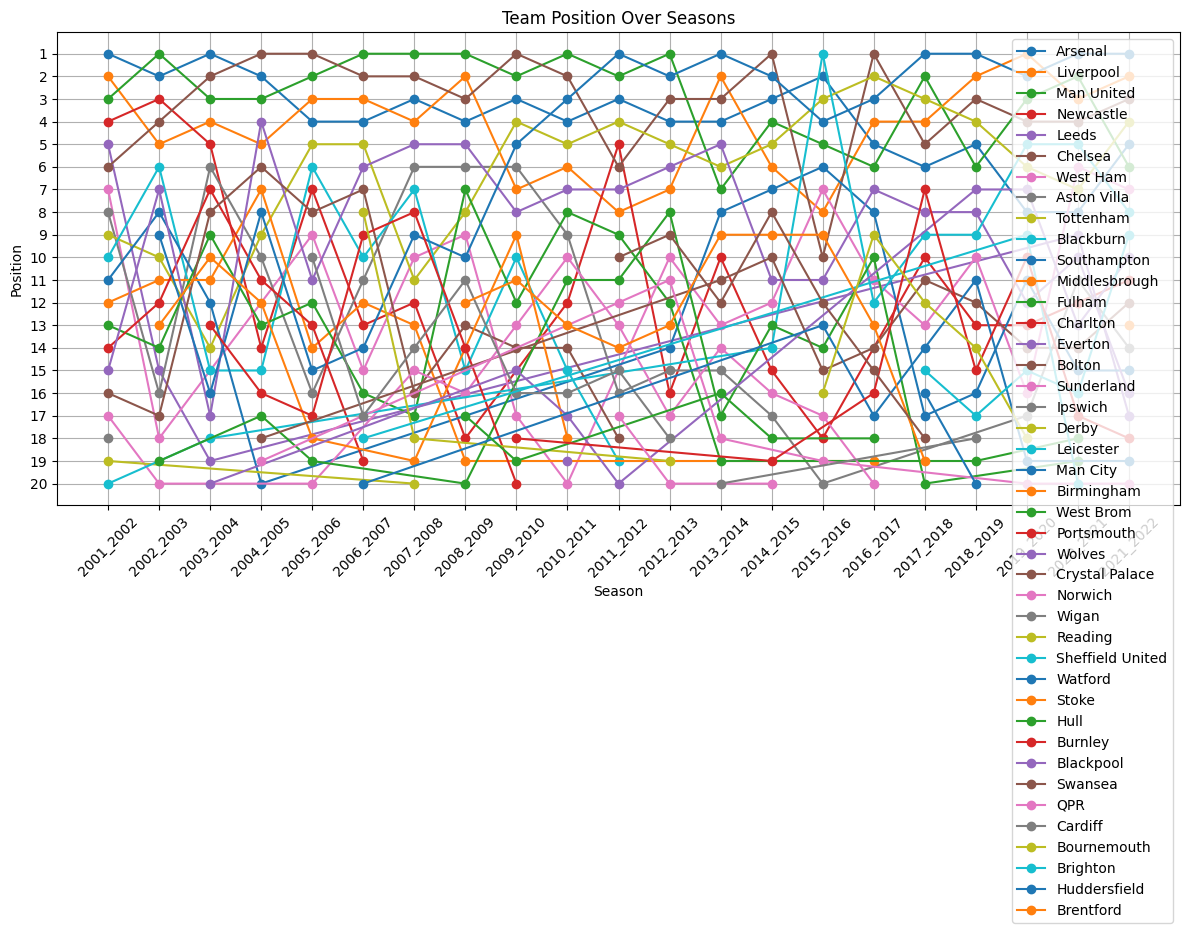

In [235]:
season_points.reset_index(inplace=True)
teams = season_points['Home Team'].unique() # getting the names of all the teams without repetition
plt.figure(figsize=(12, 8))
for team in teams:
    team_data = season_points[season_points['Home Team'] == team]
    plt.plot(team_data['Season'], team_data['Position'], marker='o', label=team) # plotting the team progress based on the position column 

# Reverse the y-axis
plt.gca().invert_yaxis() # invert the axis to have 1 on the top and 20 at the bottom for easier interpretation
plt.title('Team Position Over Seasons')
plt.xlabel('Season')
plt.ylabel('Position')
plt.xticks(rotation=45)
plt.yticks(range(20, 0, -1)) # setting the y scale to include all position
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Since the figure above can get too cluttered to find the performance of a single team, we would make a user-interactive plot that would take input from the user as an integer related to a team and then plot the performance chart of only that team.

Select a team from the following list:
1 - Arsenal
2 - Liverpool
3 - Man United
4 - Newcastle
5 - Leeds
6 - Chelsea
7 - West Ham
8 - Aston Villa
9 - Tottenham
10 - Blackburn
11 - Southampton
12 - Middlesbrough
13 - Fulham
14 - Charlton
15 - Everton
16 - Bolton
17 - Sunderland
18 - Ipswich
19 - Derby
20 - Leicester
21 - Man City
22 - Birmingham
23 - West Brom
24 - Portsmouth
25 - Wolves
26 - Crystal Palace
27 - Norwich
28 - Wigan
29 - Reading
30 - Sheffield United
31 - Watford
32 - Stoke
33 - Hull
34 - Burnley
35 - Blackpool
36 - Swansea
37 - QPR
38 - Cardiff
39 - Bournemouth
40 - Brighton
41 - Huddersfield
42 - Brentford


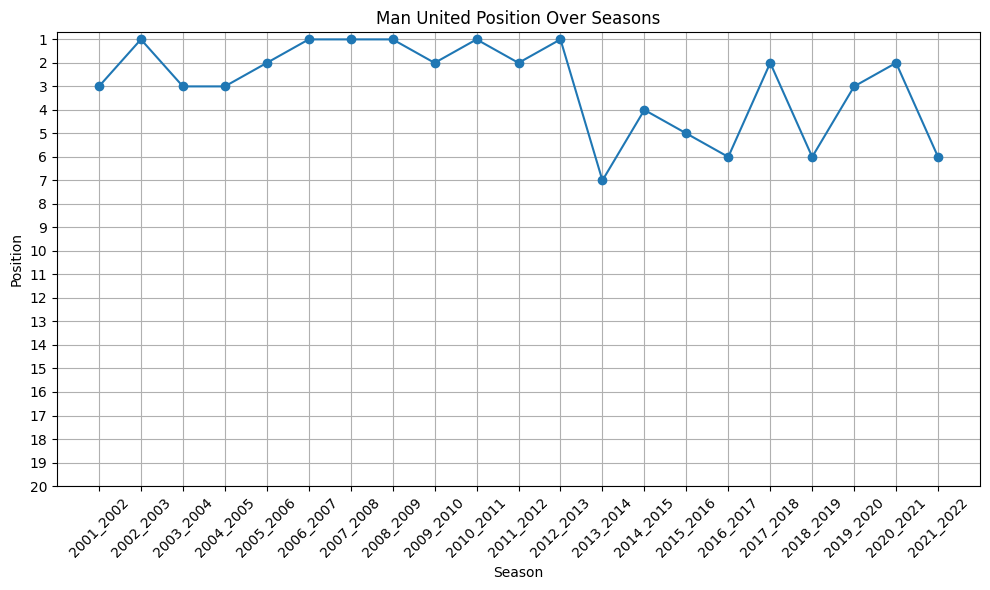

In [236]:
def one_team_plot(team_name):
    '''
    This function takes an integer as an input which is entered by the user at run-time and creates a progress chart of that team.
    '''
    team_data = season_points[season_points['Home Team'] == team_name]
    plt.figure(figsize=(10, 6))
    plt.plot(team_data['Season'], team_data['Position'], marker='o')
    plt.title(f'{team_name} Position Over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Position')
    plt.xticks(rotation=45)
    plt.yticks(range(20, 0, -1))
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Get unique team names
teams = season_points['Home Team'].unique() # get the names of the teams

# Input prompt for team selection
print("Select a team from the following list:") # prompting the user to enter the index of the teams as mentioned from the list below
for idx, team in enumerate(teams, start=1):
    print(f"{idx} - {team}")

# Prompt user to enter the number corresponding to the team
team_number = int(input("Enter the number corresponding to the team: ")) - 1 

# Plot the selected team's position over seasons
selected_team = teams[team_number]
one_team_plot(selected_team)


Another way of comparing the performance of teams would be to plot two teams side by side to compare their performances over the 20 seasons. We would use a user-defined function to take 2 inputs from the user on run-time and plot their performances side by side using the same line chart schematic.

Select two teams from the following list to compare:
1 - Arsenal
2 - Liverpool
3 - Man United
4 - Newcastle
5 - Leeds
6 - Chelsea
7 - West Ham
8 - Aston Villa
9 - Tottenham
10 - Blackburn
11 - Southampton
12 - Middlesbrough
13 - Fulham
14 - Charlton
15 - Everton
16 - Bolton
17 - Sunderland
18 - Ipswich
19 - Derby
20 - Leicester
21 - Man City
22 - Birmingham
23 - West Brom
24 - Portsmouth
25 - Wolves
26 - Crystal Palace
27 - Norwich
28 - Wigan
29 - Reading
30 - Sheffield United
31 - Watford
32 - Stoke
33 - Hull
34 - Burnley
35 - Blackpool
36 - Swansea
37 - QPR
38 - Cardiff
39 - Bournemouth
40 - Brighton
41 - Huddersfield
42 - Brentford


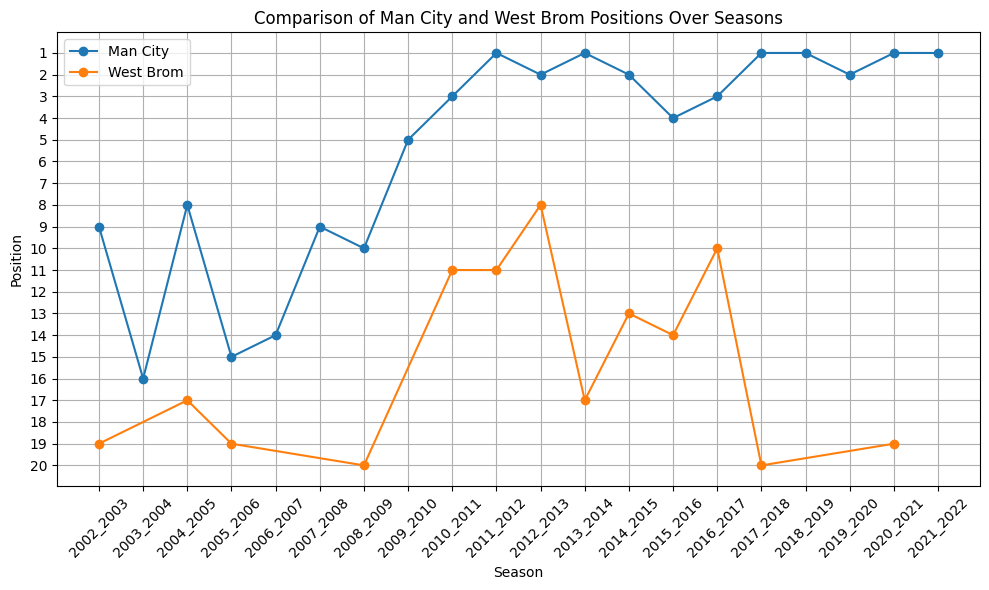

In [134]:
def compare_teams_plot(team1_name, team2_name):
    '''
    This function takes 2 integers as inputs which are entered by the user at run-time and creates a progress chart of both teams for head to head comparison.
    '''
    team1_data = season_points[season_points['Home Team'] == team1_name]
    team2_data = season_points[season_points['Home Team'] == team2_name]
    
    plt.figure(figsize=(10, 6))
    plt.plot(team1_data['Season'], team1_data['Position'], marker='o', label=team1_name)
    plt.plot(team2_data['Season'], team2_data['Position'], marker='o', label=team2_name)
    
    plt.title(f'Comparison of {team1_name} and {team2_name} Positions Over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Position')
    plt.xticks(rotation=45)
    plt.yticks(range(20, 0, -1))
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Input prompt for team selection
print("Select two teams from the following list to compare:")
for idx, team in enumerate(teams, start=1):
    print(f"{idx} - {team}")

# Prompt user to enter the numbers corresponding to the teams
team1_number = int(input("Enter the number corresponding to the first team: ")) - 1  # enter the index of the first team
team2_number = int(input("Enter the number corresponding to the second team: ")) - 1 # enter the index of the second team

# Get the names of selected teams
selected_team1 = teams[team1_number]
selected_team2 = teams[team2_number]

# Plot the positions of the selected teams over seasons
compare_teams_plot(selected_team1, selected_team2)


## Feature Engineering
---
Now that we have completed the visualization aspect of the project. We will go towards applying a predictive model to predict fucure matches based on the past but before that we would need to extarct meaningful features that can help in predicting the outcome of individual matches. when thinking about any match and the data we need to make a successful prediction, we would need to know the following features before the start of the match:
* Points won at home of the team playing
* Points won away of the team playing
* Total points won uptil now by the team playing
* Goals scored at home
* Goals scored away
* Goals conceded at home
* Goals conceded away
* Goal difference uptil now
* Team position on the league table 
* Average team position over the past 3 years 
* Average goals scored over the past 3 years 

We would need to merge the table league_results that was created initially and the table season_points on the Season and the Home Team features to gain these insights firstly for the home team and then for the away teams. This way we would have all the information needed to make a successful prediction about the match being played.

In [135]:
# merging the initial table with the EPL table for team 1 playing created to get the required features and change the column names
merged_table = league_results.merge(season_points, on = ['Home Team','Season']) 
merged_table.rename(columns={'Points Won at Home':'Home Team Points Won at Home','Points Won Away':'Home Team Points Won Away','Total Points':'Home Team Total Points','Goals Scored at Home_y':'Home Team Goals Scored at Home','Goals Scored Away_y':'Home Team Goals Scored Away','Goals For':'Home Team Goals For','Goals Conceded at Home':'Home Team Goals Conceded at Home','Goals Conceded Away':'Home Team Goals Conceded Away','Goals Against':'Home Teams Goals Against','Goal Difference':'Home Team Goal Difference','Position':'Home Team Position','Average Position in Last 3 Seasons':'Home Team Average Position in Last 3 Seasons','Average Goal Difference in Last 3 Seasons':'Home Team Average Goal Difference in Last 3 Seasons'}, inplace=True)
merged_table.columns

Index(['Season', 'Date', 'Home Team', 'Away Team', 'Half Time Home Goals',
       'Half Time Away Goals', 'Half Time Result', 'Full Time Home Goals',
       'Full Time Away Goals', 'Full Time Result', 'Home Team Shots',
       'Away Team Shots', 'Home Team Shots on Target',
       'Away Team Shots on Target', 'Home Team Yellow Cards',
       'Away Team Yellow Cards', 'Home Team Red Cards', 'Away Team Red Cards',
       'Home Team Points', 'Away Team Points', 'Winner', 'Updated Score',
       'Half Time Lead', 'Lead Preserved', 'Home Team Total Cards',
       'Away Team Total Cards', 'Red Card Impact', 'Goals Scored at Home_x',
       'Goals Scored Away_x', 'Home Team Points Won at Home',
       'Home Team Points Won Away', 'Home Team Total Points',
       'Home Team Goals Scored at Home', 'Home Team Goals Scored Away',
       'Home Team Goals For', 'Home Team Goals Conceded at Home',
       'Home Team Goals Conceded Away', 'Home Teams Goals Against',
       'Home Team Goal Difference',

In [136]:
# merging the initial table with the EPL table for team 2 playing created to get the required features and change the column names
merged_table2 = league_results.merge(season_points,left_on=['Away Team','Season'],right_on=['Home Team','Season'])
merged_table2.rename(columns={'Home Team_x':'Home Team','Points Won at Home':'Away Team Points Won at Home','Points Won Away':'Away Team Points Won Away','Total Points':'Away Team Total Points','Goals Scored at Home_y':'Away Team Goals Scored at Home','Goals Scored Away_y':'Away Team Goals Scored Away','Goals For':'Away Team Goals For','Goals Conceded at Home':'Away Team Goals Conceded at Home','Goals Conceded Away':'Away Team Goals Conceded Away','Goals Against':'Away Team Goals Against','Goal Difference':'Away Team Goal Difference','Position':'Away Team Position','Average Position in Last 3 Seasons':'Away Team Average Position in Last 3 Seasons','Average Goal Difference in Last 3 Seasons':'Away Team Average Goal Difference in Last 3 Seasons'}, inplace=True)
merged_table2.columns

Index(['Season', 'Date', 'Home Team', 'Away Team', 'Half Time Home Goals',
       'Half Time Away Goals', 'Half Time Result', 'Full Time Home Goals',
       'Full Time Away Goals', 'Full Time Result', 'Home Team Shots',
       'Away Team Shots', 'Home Team Shots on Target',
       'Away Team Shots on Target', 'Home Team Yellow Cards',
       'Away Team Yellow Cards', 'Home Team Red Cards', 'Away Team Red Cards',
       'Home Team Points', 'Away Team Points', 'Winner', 'Updated Score',
       'Half Time Lead', 'Lead Preserved', 'Home Team Total Cards',
       'Away Team Total Cards', 'Red Card Impact', 'Goals Scored at Home_x',
       'Goals Scored Away_x', 'Home Team_y', 'Away Team Points Won at Home',
       'Away Team Points Won Away', 'Away Team Total Points',
       'Away Team Goals Scored at Home', 'Away Team Goals Scored Away',
       'Away Team Goals For', 'Away Team Goals Conceded at Home',
       'Away Team Goals Conceded Away', 'Away Team Goals Against',
       'Away Team Goa

Now that both the tables have been made for the home and away teams, we would need to merge them both together to get a final dataframe to apply the predictive models on. We would be left with a dataframe containing 53 columns regarding elements of the home and away team stats, naming it final_league_results.

In [245]:
# merging the tables created for the home and away teams playing a match and dropping all the excess columns
final_league_results = merged_table.merge(merged_table2, on = ['Home Team','Away Team','Season'])
final_league_results.columns
final_league_results = final_league_results.loc[:,['Season', 'Date_x', 'Home Team', 'Away Team', 'Half Time Home Goals_x',
       'Half Time Away Goals_x', 'Half Time Result_x',
       'Full Time Home Goals_x', 'Full Time Away Goals_x',
       'Full Time Result_x', 'Home Team Shots_x', 'Away Team Shots_x',
       'Home Team Shots on Target_x', 'Away Team Shots on Target_x',
       'Home Team Yellow Cards_x', 'Away Team Yellow Cards_x',
       'Home Team Red Cards_x', 'Away Team Red Cards_x',
       'Home Team Total Cards_x', 'Away Team Total Cards_x',
       'Home Team Points_x', 'Away Team Points_x', 'Winner_x',
       'Updated Score_x', 'Half Time Lead_x', 'Lead Preserved_x',
       'Red Card Impact_x','Home Team Points Won at Home',
       'Home Team Points Won Away', 'Home Team Total Points','Home Team Goals Scored at Home',
       'Home Team Goals Scored Away','Home Team Goals For', 'Home Team Goals Conceded at Home',
       'Home Team Goals Conceded Away', 'Home Teams Goals Against',
       'Home Team Goal Difference', 'Home Team Position',
       'Home Team Average Position in Last 3 Seasons',
       'Home Team Average Goal Difference in Last 3 Seasons','Away Team Points Won at Home',
       'Away Team Points Won Away', 'Away Team Total Points','Away Team Goals Scored at Home',
       'Away Team Goals Scored Away','Away Team Goals For', 'Away Team Goals Conceded at Home',
       'Away Team Goals Conceded Away', 'Away Team Goals Against',
       'Away Team Goal Difference', 'Away Team Position',
       'Away Team Average Position in Last 3 Seasons',
       'Away Team Average Goal Difference in Last 3 Seasons']]

# renaming all the columns for better readibility
final_league_results = final_league_results.rename(columns={'Date_x':'Date','Half Time Home Goals_x':'Half Time Home Goals','Half Time Away Goals_x':'Half Time Away Goals','Half Time Result_x':'Half Time Result',
       'Full Time Home Goals_x':'Full Time Home Goals','Full Time Away Goals_x':'Full Time Away Goals',
       'Full Time Result_x':'Full Time Result','Home Team Shots_x':'Home Team Shots','Away Team Shots_x':'Away Team Shots',
       'Home Team Shots on Target_x':'Home Team Shots on Target','Away Team Shots on Target_x':'Away Team Shots on Target',
       'Home Team Yellow Cards_x':'Home Team Yellow Cards','Away Team Yellow Cards_x':'Away Team Yellow Cards',
       'Home Team Red Cards_x':'Home Team Red Cards','Away Team Red Cards_x':'Away Team Red Cards',
       'Home Team Total Cards_x':'Home Team Total Cards','Away Team Total Cards_x':'Away Team Total Cards',
       'Home Team Points_x':'Home Team Points','Away Team Points_x':'Away Team Points','Winner_x':'Winner',
       'Updated Score_x':'Updated Score','Half Time Lead_x':'Half Time Lead','Lead Preserved_x':'Lead Preserved',
       'Red Card Impact_x':'Red Card Impact'})
final_league_results.shape

(7980, 53)

Adding the final feature that would be useful for a prediction would be the differnece of the positions of the teams once they are playing. In general terms, it would be expected that a team that is higher up on the league at the day of the match would win the fixture against a team that is much lower on the table. That metric can be obtined by getting a difference column.

In [138]:
#column to get the positional difference of both the teams playing
final_league_results['Difference of Positions'] = final_league_results['Home Team Position'] - final_league_results['Away Team Position']
final_league_results

,Season,Date,Home Team,Away Team,Half Time Home Goals,Half Time Away Goals,Half Time Result,Full Time Home Goals,Full Time Away Goals,Full Time Result,...,Away Team Goals Scored Away,Away Team Goals For,Away Team Goals Conceded at Home,Away Team Goals Conceded Away,Away Team Goals Against,Away Team Goal Difference,Away Team Position,Away Team Average Position in Last 3 Seasons,Away Team Average Goal Difference in Last 3 Seasons,Difference of Positions
0,2001_2002,18/08/01,Charlton,Everton,0.0,0.0,D,1.0,2.0,A,...,19.0,45.0,23.0,34.0,57.0,-12.0,15,15.000000,-12.000000,-1
1,2001_2002,18/08/01,Derby,Blackburn,1.0,0.0,H,2.0,1.0,H,...,22.0,55.0,20.0,31.0,51.0,4.0,10,10.000000,4.000000,9
2,2001_2002,18/08/01,Leeds,Southampton,0.0,0.0,D,2.0,0.0,H,...,23.0,46.0,22.0,32.0,54.0,-8.0,11,11.000000,-8.000000,-6
3,2001_2002,18/08/01,Leicester,Bolton,0.0,4.0,A,0.0,5.0,A,...,24.0,44.0,31.0,31.0,62.0,-18.0,16,16.000000,-18.000000,4
4,2001_2002,18/08/01,Liverpool,West Ham,1.0,1.0,D,2.0,1.0,H,...,16.0,48.0,14.0,43.0,57.0,-9.0,7,7.000000,-9.000000,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,2021_2022,22/05/2022,Crystal Palace,Man United,1.0,0.0,H,1.0,0.0,H,...,25.0,57.0,22.0,35.0,57.0,0.0,6,3.666667,19.666667,6
7976,2021_2022,22/05/2022,Leicester,Southampton,0.0,0.0,D,4.0,1.0,H,...,20.0,43.0,24.0,43.0,67.0,-24.0,15,13.666667,-18.000000,-7
7977,2021_2022,22/05/2022,Liverpool,Wolves,1.0,1.0,D,3.0,1.0,H,...,18.0,38.0,25.0,18.0,43.0,-5.0,10,10.000000,-3.333333,-8
7978,2021_2022,22/05/2022,Man City,Aston Villa,0.0,1.0,A,3.0,2.0,H,...,23.0,52.0,29.0,25.0,54.0,-2.0,14,14.000000,-6.333333,-13


## Modeling and Classifications
---
Now we need to ge the columns that are needed for the predictions, those columns are 27 onwards so we would use the .iloc method to extract those columns. Three columns that are needed are also the Home Team, Away Team and the Full Time Result column so we would add them manually without the .iloc method. The dataframe would be named X. 

In [187]:
X = final_league_results.iloc[:, 27:] # creating the predictor dataframe using columns 27 and above
X[['Season', 'Home Team', 'Away Team', 'Full Time Result']] = final_league_results[['Season', 'Home Team', 'Away Team', 'Full Time Result']] # addivg column to the predictor dataframe

X = X.set_index('Season')

,Home Team Points Won at Home,Home Team Points Won Away,Home Team Total Points,Home Team Goals Scored at Home,Home Team Goals Scored Away,Home Team Goals For,Home Team Goals Conceded at Home,Home Team Goals Conceded Away,Home Teams Goals Against,Home Team Goal Difference,...,Away Team Goals Conceded Away,Away Team Goals Against,Away Team Goal Difference,Away Team Position,Away Team Average Position in Last 3 Seasons,Away Team Average Goal Difference in Last 3 Seasons,Difference of Positions,Home Team,Away Team,Full Time Result
Season,,,,,,,,,,,,,,,,,,,,,
2001_2002,21,23,44,23.0,15.0,38.0,30.0,19.0,49.0,-11.0,...,34.0,57.0,-12.0,15,15.000000,-12.000000,-1,Charlton,Everton,A
2001_2002,19,11,30,20.0,13.0,33.0,26.0,37.0,63.0,-30.0,...,31.0,51.0,4.0,10,10.000000,4.000000,9,Derby,Blackburn,H
2001_2002,33,33,66,31.0,22.0,53.0,21.0,16.0,37.0,16.0,...,32.0,54.0,-8.0,11,11.000000,-8.000000,-6,Leeds,Southampton,H
2001_2002,16,12,28,15.0,15.0,30.0,34.0,30.0,64.0,-34.0,...,31.0,62.0,-18.0,16,16.000000,-18.000000,4,Leicester,Bolton,A
2001_2002,41,39,80,33.0,34.0,67.0,14.0,16.0,30.0,37.0,...,43.0,57.0,-9.0,7,7.000000,-9.000000,-5,Liverpool,West Ham,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_2022,29,19,48,27.0,23.0,50.0,17.0,29.0,46.0,4.0,...,35.0,57.0,0.0,6,3.666667,19.666667,6,Crystal Palace,Man United,H
2021_2022,34,18,52,34.0,28.0,62.0,23.0,36.0,59.0,3.0,...,43.0,67.0,-24.0,15,13.666667,-18.000000,-7,Leicester,Southampton,H
2021_2022,49,43,92,49.0,45.0,94.0,9.0,17.0,26.0,68.0,...,18.0,43.0,-5.0,10,10.000000,-3.333333,-8,Liverpool,Wolves,H


To prepare the model for predictive modeling we would first need to encode it using the sklearn package and using the function LabelEncoder. This would encode all features of the features of the X data set and give them a numeric value of they have a string or a categorical datatype. In our case it would effect only the Home Team and the Away Team columns as they are the only non-numeric columns we have.

In [188]:
le = LabelEncoder()
X_en = X.copy()
X_en['Home Team'] = le.fit_transform(X['Home Team']) #encoding the home team column to get int values for model prediction
X_en['Away Team'] = le.transform(X['Away Team']) # applying the transformation to the away team names

,Home Team Points Won at Home,Home Team Points Won Away,Home Team Total Points,Home Team Goals Scored at Home,Home Team Goals Scored Away,Home Team Goals For,Home Team Goals Conceded at Home,Home Team Goals Conceded Away,Home Teams Goals Against,Home Team Goal Difference,...,Away Team Goals Conceded Away,Away Team Goals Against,Away Team Goal Difference,Away Team Position,Away Team Average Position in Last 3 Seasons,Away Team Average Goal Difference in Last 3 Seasons,Difference of Positions,Home Team,Away Team,Full Time Result
Season,,,,,,,,,,,,,,,,,,,,,
2001_2002,21,23,44,23.0,15.0,38.0,30.0,19.0,49.0,-11.0,...,34.0,57.0,-12.0,15,15.0,-12.0,-1,11,15,A
2001_2002,19,11,30,20.0,13.0,33.0,26.0,37.0,63.0,-30.0,...,31.0,51.0,4.0,10,10.0,4.0,9,14,3,H
2001_2002,33,33,66,31.0,22.0,53.0,21.0,16.0,37.0,16.0,...,32.0,54.0,-8.0,11,11.0,-8.0,-6,20,32,H
2001_2002,16,12,28,15.0,15.0,30.0,34.0,30.0,64.0,-34.0,...,31.0,62.0,-18.0,16,16.0,-18.0,4,21,5,A
2001_2002,41,39,80,33.0,34.0,67.0,14.0,16.0,30.0,37.0,...,43.0,57.0,-9.0,7,7.0,-9.0,-5,22,39,H


For splitting the data into training and testing dataframes, we choose to train it on the first 18 seasons in our dataframe and then test it on the last two seasons. For this purpose, we will first use the .loc method to get the last two seasons 2020/2021 and 2021/2022 and then in reverse to get all the rows that are before the season 2020/2021. Naming them the test and train datasets respectively.

We would also need to distinguish the label y which would be the column 'Full Time Result' as this would be the column to check the accuracy of our predictions on.

In [238]:
# making the testing and training dataframes. Not using test_train_split as data is sequential and can't use random split
X_test = X_en.loc['2020_2021':].reset_index()
X_train = X_en.loc[:'2020_2021'].reset_index()
y_train = X_train['Full Time Result'] # creating the response variable
y_test = X_test['Full Time Result']

X_train = X_train.drop(['Season', 'Full Time Result'], axis=1)
X_test = X_test.drop(['Season', 'Full Time Result'], axis=1)

X_train.shape, X_test.shape, len(y_train), len(y_test)

((1504, 30), (4492, 30), 1504, 4492)

Now we can make a correlation matrix of the X dataframe so we can see the relations between all the features in the dataframe. We first have to drop the columns 'Home Team', 'Away Team' and the 'Full Time Result' as they are string columns and we cannot create a collinearity between string columns.For all the numeric features, the correlation matrix in the form of a heatmap is below.

We see that there is a very strong positive relation among features that part of the home team statistics and subsequently strong correlation among the features related to the away team statistics, while there is almost no correlation between home and away team statistics. We will use the seaborn heatmap package for this.

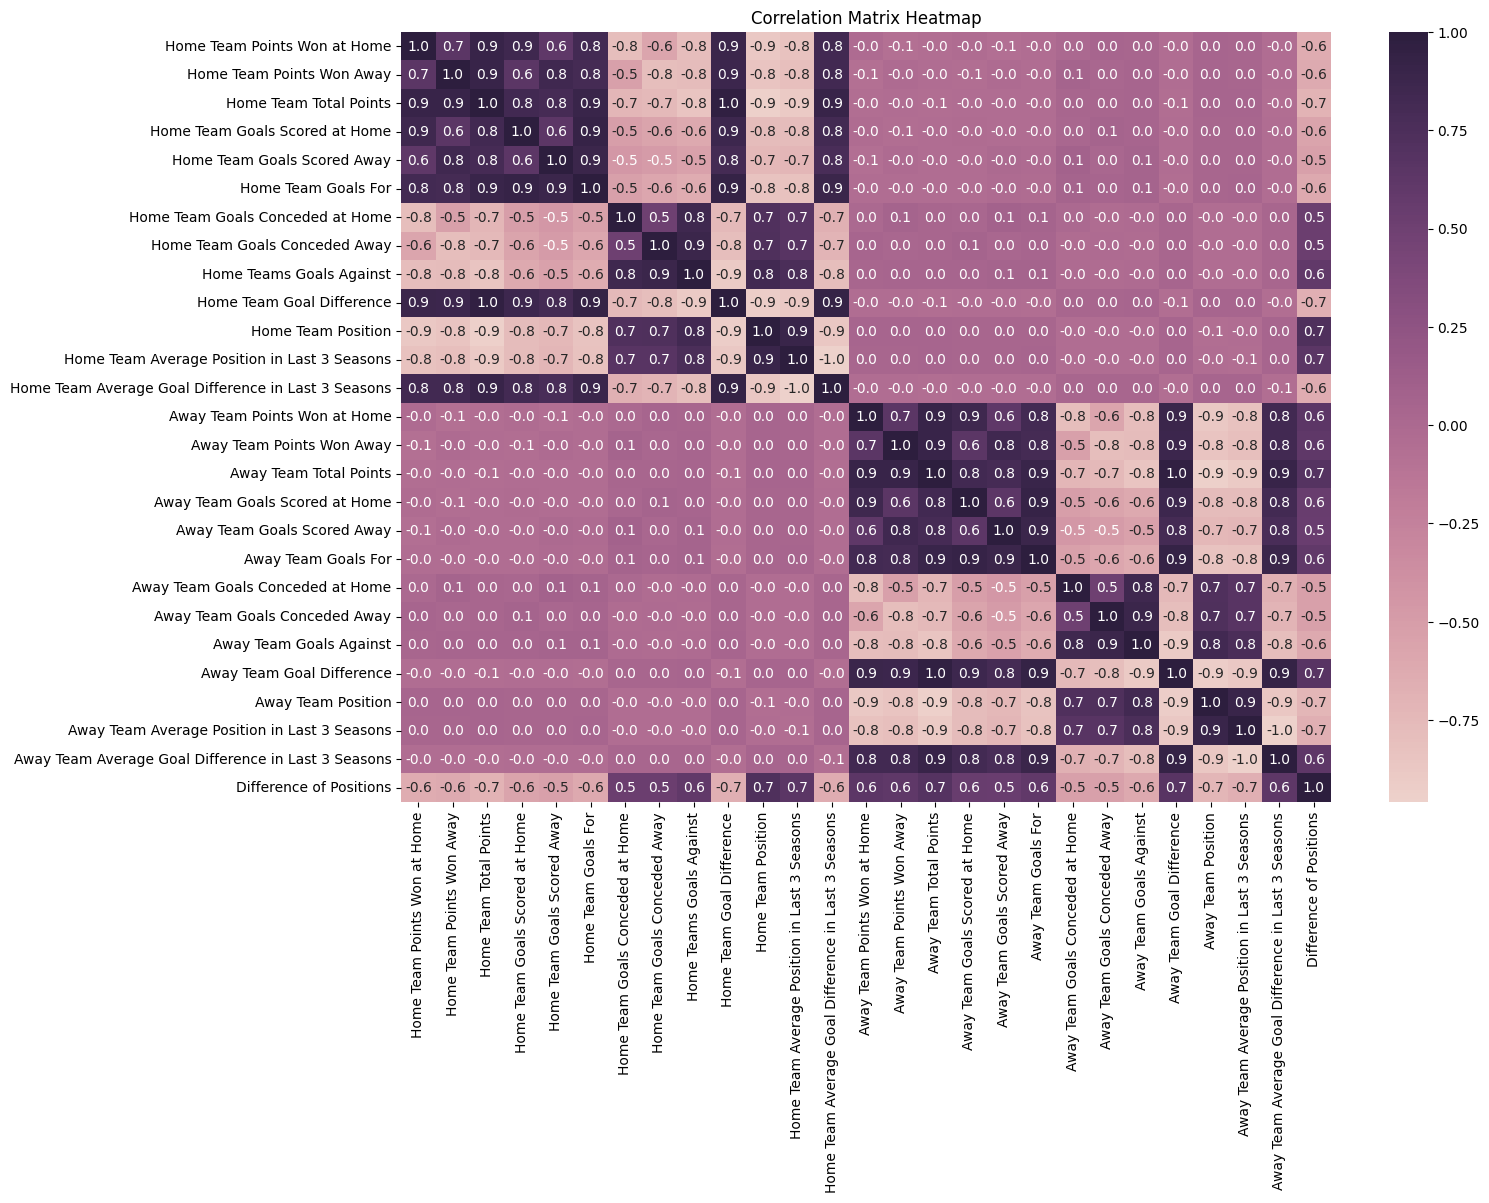

In [190]:
correlation_matrix = X.drop(['Home Team', 'Away Team', 'Full Time Result'], axis=1).corr() # dropping the string columns

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".1f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Now we would need to bring uniformity to the dataset so that all the values fall under a specific bracket of values to ensure a good model prediction. Standardization involves adjusting the input features by first centering them (subtracting the mean from each data point) and then dividing them by the standard deviation, resulting in the data having a mean of 0 and a standard deviation of 1. We would use the sklearn package for this.

In [191]:
# scaling the dataframe for consistent values 
scaler = StandardScaler() 
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Now we are ready to get our prediction using Logistic Regression and for that we use the sklearn package and the LogisticRegression package. We train the data on the training dataset and test it on the testing dataset and we see that the accuracy score is 57.89% and the f1 score is 52.11%

In [192]:
model = LogisticRegression(solver='liblinear') # applying logistic regression
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)

accuracy_score(y_test, y_pred)

0.5789473684210527

In [193]:
f1_score(y_test, y_pred, average='weighted')

0.521111226095614

The we get the prediction probabilities of all the matches. They give us the three scores for Home Win, Draw and the Away Win for each game separately. For this we use the funciton predict_proba from the sklearn package.

In [194]:
y_proba = model.predict_proba(X_test_sc) # predicting probabilites of all 3 outcomes of a match
y_proba

array([[0.62444935, 0.34844915, 0.0271015 ],
       [0.33632743, 0.15910628, 0.50456629],
       [0.40859315, 0.17098618, 0.42042068],
       ...,
       [0.06373395, 0.21275088, 0.72351517],
       [0.04946144, 0.17107503, 0.77946354],
       [0.71968159, 0.22439433, 0.05592408]])

The second predictive model we are using is the SVM and we get that from the sklearn package. We get the accuracy value of 58.68% and f1 score of 52.15%.

In [195]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) # predicting accuracy using SVM. gamma is set to auto to determine individual datapoint influence
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.5868421052631579

In [196]:
f1_score(y_test, y_pred, average='weighted')

0.5215126405866203

The third predictive model we are using is the Random Forest from the sklearn package and we see that it gives the best accuracy of the three models we have used and gives the score of 78.94% and an f1 score of 77.32%.

In [197]:
clf = RandomForestClassifier() # using random forest classifier
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
accuracy_score(y_test, y_pred)

0.7710526315789473

In [198]:
f1_score(y_test, y_pred, average='weighted')

0.7639834098109842

The Last predictive model we are using is Decision Tree and we will also ennumerate the list of features in their importance using the code given to us in the Decision Trees lab taught in the course and subsequntly plot the decision tree using matplotlib with a tree depth of 3 (as is advised in the lab).

In [204]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state=7) # using decision trees with depth = 3
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7226179875333927

In [205]:
f1_score(y_test, y_pred, average='weighted')

0.6990214405454359

In [206]:
# getting the list of the most important features in the prediction
feature_importances_dict = {} 
for i, name in enumerate(X_train): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True)) 
print('Features in order of importance:')   
for key in feature_importances_sorted:
    print(key)

Features in order of importance:
Difference of Positions
Away Team Points Won Away
Home Team Points Won at Home
Away Team Goals Scored Away
index
Home Team Points Won Away
Home Team Total Points
Home Team Goals Scored at Home
Home Team Goals Scored Away
Home Team Goals For
Home Team Goals Conceded at Home
Home Team Goals Conceded Away
Home Teams Goals Against
Home Team Goal Difference
Home Team Position
Home Team Average Position in Last 3 Seasons
Home Team Average Goal Difference in Last 3 Seasons
Away Team Points Won at Home
Away Team Total Points
Away Team Goals Scored at Home
Away Team Goals For
Away Team Goals Conceded at Home
Away Team Goals Conceded Away
Away Team Goals Against
Away Team Goal Difference
Away Team Position
Away Team Average Position in Last 3 Seasons
Away Team Average Goal Difference in Last 3 Seasons
Home Team
Away Team


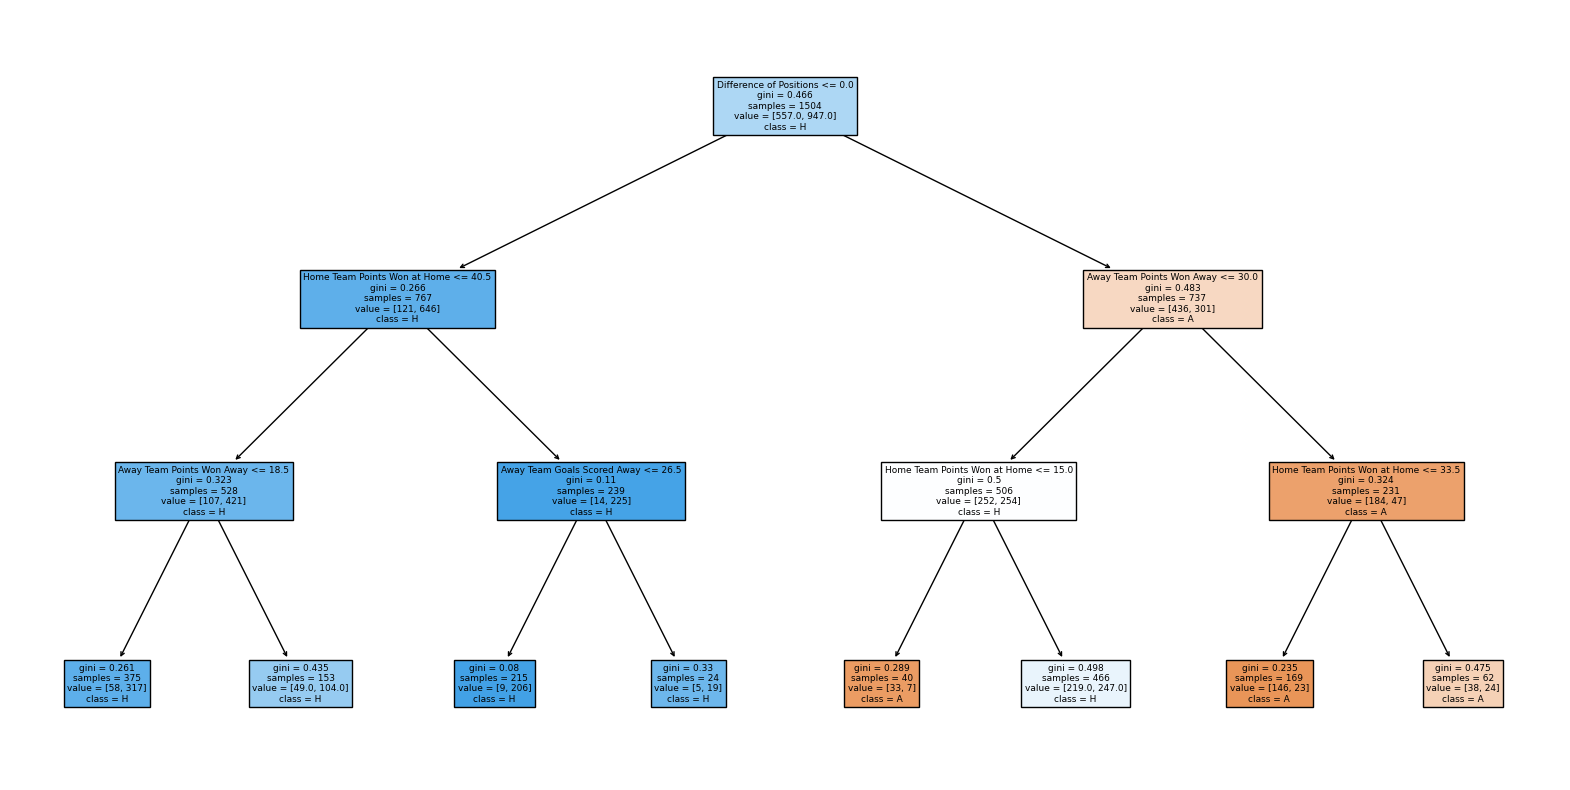

In [207]:
# plotting the decision tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X_train.columns,class_names=y_train,filled=True) # _ stops annotations print-out


Since this is a multiclass problem where we can have results equal to WIN, LOSE or DRAW. The accuracies of models is slightly below ideal (except Random Forest). If we remove the DRAW aspect and make this a binary class problem to predict a Winner and Loser, we ca get much higher accuracies. 

In [202]:
X = final_league_results.iloc[:, 27:]
X[['Season', 'Home Team', 'Away Team', 'Full Time Result']] = final_league_results[['Season', 'Home Team', 'Away Team', 'Full Time Result']]

# for binary classification dropping the rows that account for a draw and rest all code is the same as above
X = X[X['Full Time Result'] != 'D']
le = LabelEncoder()
X_en = X.copy()
X_en['Home Team'] = le.fit_transform(X['Home Team'])
X_en['Away Team'] = le.transform(X['Away Team'])
X_en.head()
X_test = X_en.loc['2020_2021':].reset_index()
X_train = X_en.loc[:'2020_2021'].reset_index()
y_train = X_train['Full Time Result']
y_test = X_test['Full Time Result']

X_train = X_train.drop(['Season', 'Full Time Result'], axis=1)
X_test = X_test.drop(['Season', 'Full Time Result'], axis=1)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)

lr = accuracy_score(y_test, y_pred)
print(f'The accuracy with Logostic Regression is: {lr}')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'The f1_score with logistic regression is: {f1}')

y_proba = model.predict_proba(X_test_sc)
print(f'The Probabilities of individual matces is: {y_proba}')


clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
sv = accuracy_score(y_test,y_pred)
print(f'The accuracy with svm is: {sv}')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'The f1_score with svm is: {f1}')

clf = RandomForestClassifier()
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
rf = accuracy_score(y_test, y_pred)
print(f'The accuracy with random forrest classifer is: {rf}')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'The f1_score with random forrest is classifier: {f1}')

decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state=7) 
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)
dt = accuracy_score(y_test, y_pred)
print(f'The accuracy with decision tree classifer is: {dt}')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'The f1_score with decision tree is classifier: {f1}')

The accuracy with Logostic Regression is: 0.7651380231522708
The f1_score with logistic regression is: 0.7618675288595207
The Probabilities of individual matces is: [[0.28117147 0.71882853]
 [0.23244573 0.76755427]
 [0.0384131  0.9615869 ]
 ...
 [0.07297535 0.92702465]
 [0.06314546 0.93685454]
 [0.94514952 0.05485048]]
The accuracy with svm is: 0.6591718610863758
The f1_score with svm is: 0.5908860262036831
The accuracy with random forrest classifer is: 0.7451024042742653
The f1_score with random forrest is classifier: 0.7397962543345273
The accuracy with decision tree classifer is: 0.7226179875333927
The f1_score with decision tree is classifier: 0.6990214405454359


Lastly, we will use the technique of grid search to try and find the best hyperparameter grids for each model separately. This is done after doing the required pipelines for SVM as it required preprocessing of data, then the grid search CV are initialized for each model. Once the models are fit the best parameters and the best score is extracted for each of the 3 ML models using the grid search CV objects.

In [208]:
# Define hyperparameter grids for each model
log_reg_param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
                      'logisticregression__penalty': ['l1', 'l2']}

svm_param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__gamma': ['scale', 'auto'],
                  'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

dt_param_grid = {'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10]}

# Define models with pipelines if necessary
log_reg_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
svm_pipe = make_pipeline(StandardScaler(), SVC())
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

# Create GridSearchCV objects for each model
log_reg_grid_search = GridSearchCV(log_reg_pipe, log_reg_param_grid, cv=5, scoring='accuracy')
svm_grid_search = GridSearchCV(svm_pipe, svm_param_grid, cv=5, scoring='accuracy')
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV objects to data
log_reg_grid_search.fit(X_train, y_train)
svm_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train, y_train)

# Get best parameters and scores
log_reg_best_params = log_reg_grid_search.best_params_
log_reg_best_score = log_reg_grid_search.best_score_

svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_

print("Logistic Regression Best Parameters:", log_reg_best_params)
print("Logistic Regression Best Score:", log_reg_best_score)

print("SVM Best Parameters:", svm_best_params)
print("SVM Best Score:", svm_best_score)

print("Random Forest Best Parameters:", rf_best_params)
print("Random Forest Best Score:", rf_best_score)

print("Decision Tree Best Parameters:", dt_best_params)
print("Decision Tree Best Score:", dt_best_score)


Logistic Regression Best Parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
Logistic Regression Best Score: 0.7633089700996678
SVM Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
SVM Best Score: 0.7566600221483942
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Best Score: 0.7446821705426357
Decision Tree Best Parameters: {'max_depth': 30, 'min_samples_split': 2}
Decision Tree Best Score: 0.6150343300110743


## Conclusion
---
The problem that we tried to solve with our project revolved around predicting outcomes of football games before they happen based on a systematic assessment of parameters and features. The features we extracted had to be available to us before the start of a match and for that purpose we evaluated the following attributes:
* Team Positions in the table
* Average ranking in the last 3 seasons
* Average goals scored in the last seasons
* Points accumulated in the ongoing season
* Goals scored and conceded at home and away matches
* Difference of positions in the table

Based on the parameters that we got, we made visualizations using bar and line plots to track the outcomes of matches and team performances over the last 2 decades and made interesting insights into various attributes of our dataset. After that we set out to perform predicting modeling on our dataset and used several models to achieve our results. They included:
* Logistic Regression
* SVM
* F1 Score
* Decision Trees and Random Forests
All the models gave respectable results based on the fact that when our features are highly correlated with each other, the regression models generally give of comparatively low performance that is why the model Random Forests gave the highest accuracy. We then further reduced the model to a binary class problem to further improve the accuracy by simply dropping the rows where we have the outcome of a match as draw.

Based on the predictions we got, we can see that there are certain improvements that can be made to improve the accuracy of the results in the future. These improvements include:
* Adding additional features using feature engineering that can include adding stats of individual players taking part in the game
* Using APIs to get stadium impact on the teams as some stadiums pose a unique challenge to the visiting teams

These proposed improvements aim to enrich the predictive capabilities of the model and provide deeper insights into the factors shaping football match outcomes. Through iterative refinement and integration of advanced methodologies, the project endeavors to further advance the accuracy and robustness of its predictions in future iterations.
